In [2]:
import pandas as pd
import numpy as np
ruta='files/'

data=pd.read_csv(ruta+'temps.txt',sep='\s+',header=None) # Fuente: http://astro.iam.udg.mx/Estacion/NOAAPRMO.TXT
                                                         #         http://astro.iam.udg.mx/Estacion/NOAAMO.TXT
data.columns=['Temperatura máxima','Temperatura mínima','HDD','CDD','Rain']
d=['Sábado','Domingo','Lunes','Martes','Miércoles','Jueves','Viernes']
dias=[d[i%7] for i in range(len(data))]
catego=['Soleado','Mayormente soleado','Parcialmente nublado','Mayormente nublado','Nublado','Lluvioso']
prono=[catego[-1] if data['Rain'][i]>0 else catego[int(round(1.2*(data['HDD'][i]-data['CDD'][i])+2))] for i in range(len(data))]
df=pd.DataFrame(columns=['Días','Pronóstico','Temperatura máxima','Temperatura mínima'],index=range(len(data)))
df.iloc[:,2:4]=data.iloc[:,0:2]
df['Días']=dias
df['Pronóstico']=prono
df.head()

,Días,Pronóstico,Temperatura máxima,Temperatura mínima
0,Sábado,Parcialmente nublado,28.2,11.2
1,Domingo,Parcialmente nublado,29.1,10.7
2,Lunes,Mayormente nublado,26.1,10.4
3,Martes,Mayormente soleado,29.4,11.1
4,Miércoles,Mayormente soleado,29.8,11.1


# Codificación lineal

## Variable días

In [3]:
#@title variable Días
n=len(df['Días'].unique()) # Cardinalidad
print('n:',n)
df['Días'].unique()

n: 7


array(['Sábado', 'Domingo', 'Lunes', 'Martes', 'Miércoles', 'Jueves',
       'Viernes'], dtype=object)

In [4]:
D=df['Días'].unique()
Días_ord=np.concatenate([D[1:],D[:1]])
Días_ord

array(['Domingo', 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes',
       'Sábado'], dtype=object)

In [5]:
L=n-1 if n%2==0 else int((n-1)/2)
step=2 if n%2==0 else 1
x=range(-L,L+1,step)
list(x)

[-3, -2, -1, 0, 1, 2, 3]

In [6]:
a1=1
Días_lin={catego:a1*i for catego,i in zip(Días_ord,x)}
Días_lin

{'Domingo': -3,
 'Lunes': -2,
 'Martes': -1,
 'Miércoles': 0,
 'Jueves': 1,
 'Viernes': 2,
 'Sábado': 3}

In [7]:
df['Días_lin']=df['Días'].map(Días_lin)
df.head()

,Días,Pronóstico,Temperatura máxima,Temperatura mínima,Días_lin
0,Sábado,Parcialmente nublado,28.2,11.2,3
1,Domingo,Parcialmente nublado,29.1,10.7,-3
2,Lunes,Mayormente nublado,26.1,10.4,-2
3,Martes,Mayormente soleado,29.4,11.1,-1
4,Miércoles,Mayormente soleado,29.8,11.1,0


In [8]:
#@title Variable Pronóstico
n=len(df['Pronóstico'].unique())
L=n-1 if n%2==0 else int((n-1)/2)
step=2 if n%2==0 else 1
x=range(-L,L+1,step)
list(x)

[-5, -3, -1, 1, 3, 5]

In [9]:
p=df['Pronóstico'].unique()
p

array(['Parcialmente nublado', 'Mayormente nublado', 'Mayormente soleado',
       'Soleado', 'Lluvioso', 'Nublado'], dtype=object)

In [10]:
Pronóstico_ord=np.concatenate([np.array([p[-2],p[1],p[-1],p[0]]),p[2:4]])
Pronóstico_ord

array(['Lluvioso', 'Mayormente nublado', 'Nublado',
       'Parcialmente nublado', 'Mayormente soleado', 'Soleado'],
      dtype=object)

In [11]:
Pronóstico_lin={catego:a1*i for catego,i in zip(Pronóstico_ord,x)}
Pronóstico_lin

{'Lluvioso': -5,
 'Mayormente nublado': -3,
 'Nublado': -1,
 'Parcialmente nublado': 1,
 'Mayormente soleado': 3,
 'Soleado': 5}

In [12]:
df['Pronóstico_lin']=df['Pronóstico'].map(Pronóstico_lin)
df.head()

,Días,Pronóstico,Temperatura máxima,Temperatura mínima,Días_lin,Pronóstico_lin
0,Sábado,Parcialmente nublado,28.2,11.2,3,1
1,Domingo,Parcialmente nublado,29.1,10.7,-3,1
2,Lunes,Mayormente nublado,26.1,10.4,-2,-3
3,Martes,Mayormente soleado,29.4,11.1,-1,3
4,Miércoles,Mayormente soleado,29.8,11.1,0,3


# Codificación cuadrática

In [13]:
def cuad(var_ord,a2=1):
  n=len(var_ord)
  L=n-1 if n%2==0 else (n-1)//2
  S=2 if n%2==0 else 1
  x=range(-L,L+1,S)
  a1=0
  a0=-a2/n*np.sum([i**2 for i in x])
  return {catego:a0+a1*i+a2*i**2 for catego,i in zip(var_ord,x)}

In [14]:
Días_ord

array(['Domingo', 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes',
       'Sábado'], dtype=object)

In [15]:
Pronóstico_ord

array(['Lluvioso', 'Mayormente nublado', 'Nublado',
       'Parcialmente nublado', 'Mayormente soleado', 'Soleado'],
      dtype=object)

In [16]:
df['Días_cuad']=df['Días'].map(cuad(Días_ord))
df.head(10)

,Días,Pronóstico,Temperatura máxima,Temperatura mínima,Días_lin,Pronóstico_lin,Días_cuad
0,Sábado,Parcialmente nublado,28.2,11.2,3,1,5.0
1,Domingo,Parcialmente nublado,29.1,10.7,-3,1,5.0
2,Lunes,Mayormente nublado,26.1,10.4,-2,-3,0.0
3,Martes,Mayormente soleado,29.4,11.1,-1,3,-3.0
4,Miércoles,Mayormente soleado,29.8,11.1,0,3,-4.0
5,Jueves,Mayormente soleado,30.2,10.2,1,3,-3.0
6,Viernes,Mayormente soleado,29.3,10.3,2,3,0.0
7,Sábado,Mayormente soleado,28.6,10.9,3,3,5.0
8,Domingo,Parcialmente nublado,29.0,9.8,-3,1,5.0
9,Lunes,Mayormente soleado,27.2,11.2,-2,3,0.0


In [20]:
df['Pronóstico_cuad']=df['Pronóstico'].map(cuad(Pronóstico_ord))
df.head()

,Días,Pronóstico,Temperatura máxima,Temperatura mínima,Días_lin,Pronóstico_lin,Días_cuad,Pronóstico_cuad
0,Sábado,Parcialmente nublado,28.2,11.2,3,1,5.0,-10.666667
1,Domingo,Parcialmente nublado,29.1,10.7,-3,1,5.0,-10.666667
2,Lunes,Mayormente nublado,26.1,10.4,-2,-3,0.0,-2.666667
3,Martes,Mayormente soleado,29.4,11.1,-1,3,-3.0,-2.666667
4,Miércoles,Mayormente soleado,29.8,11.1,0,3,-4.0,-2.666667


# Normalización

In [21]:
Días_cuad=cuad(Días_ord)
Días_cuad

{'Domingo': 5.0,
 'Lunes': 0.0,
 'Martes': -3.0,
 'Miércoles': -4.0,
 'Jueves': -3.0,
 'Viernes': 0.0,
 'Sábado': 5.0}

In [22]:
Pronóstico_cuad=cuad(Pronóstico_ord)
Pronóstico_cuad

{'Lluvioso': 13.333333333333334,
 'Mayormente nublado': -2.666666666666666,
 'Nublado': -10.666666666666666,
 'Parcialmente nublado': -10.666666666666666,
 'Mayormente soleado': -2.666666666666666,
 'Soleado': 13.333333333333334}

In [23]:
# Calcular la Norma euclideana de 'Días'
n_Días=np.sqrt(np.sum([i**2 for i in Días_cuad.values()]))
n_Días

9.16515138991168

In [26]:
# Calcular la Norma euclideana de 'Pronóstico'
n_Pronóstico=np.sqrt(np.sum([i**2 for i in Pronóstico_cuad.values()]))
n_Pronóstico

24.440403706431148

In [32]:
# Para normalizar hay que dividir entre la norma
# Creamos copia del diccionario
p_cuad=Pronóstico_cuad.copy()
d_cuad=Días_cuad.copy()

# Iterar los keys de los diciconarios para asignarlo 

for k, value in Pronóstico_cuad.items():
    p_cuad[k]=value/n_Pronóstico

for k, value in Días_cuad.items():
    d_cuad[k]=value/n_Días
np.sum([i**2 for i in p_cuad.values()]), np.sum([i**2 for i in d_cuad.values()])


(0.9999999999999998, 1.0000000000000002)

In [33]:
df['Pronóstico_cuad']=df['Pronóstico'].map(p_cuad)
df['Días_cuad']=df['Días'].map(d_cuad)
df.head()

,Días,Pronóstico,Temperatura máxima,Temperatura mínima,Días_lin,Pronóstico_lin,Días_cuad,Pronóstico_cuad
0,Sábado,Parcialmente nublado,28.2,11.2,3,1,0.545545,-0.436436
1,Domingo,Parcialmente nublado,29.1,10.7,-3,1,0.545545,-0.436436
2,Lunes,Mayormente nublado,26.1,10.4,-2,-3,0.000000,-0.109109
3,Martes,Mayormente soleado,29.4,11.1,-1,3,-0.327327,-0.109109
4,Miércoles,Mayormente soleado,29.8,11.1,0,3,-0.436436,-0.109109


# Regresón lineal

In [18]:
from sklearn.linear_model import LinearRegression

In [36]:
#Oops
n_lin = np.sqrt(np.sum([i**2 for i in Pronóstico_lin.values()]))
n_lin

8.366600265340756

In [37]:
# Normalización de Pronóstico_lin
p_lin=Pronóstico_lin.copy()
for k, value in Pronóstico_lin.items():
    p_lin[k]=value/n_lin
np.sum([i**2 for i in p_lin.values()])

0.9999999999999999

In [38]:
df['Pronóstico_lin']=df['Pronóstico'].map(p_lin)
df.head()

,Días,Pronóstico,Temperatura máxima,Temperatura mínima,Días_lin,Pronóstico_lin,Días_cuad,Pronóstico_cuad
0,Sábado,Parcialmente nublado,28.2,11.2,3,0.119523,0.545545,-0.436436
1,Domingo,Parcialmente nublado,29.1,10.7,-3,0.119523,0.545545,-0.436436
2,Lunes,Mayormente nublado,26.1,10.4,-2,-0.358569,0.000000,-0.109109
3,Martes,Mayormente soleado,29.4,11.1,-1,0.358569,-0.327327,-0.109109
4,Miércoles,Mayormente soleado,29.8,11.1,0,0.358569,-0.436436,-0.109109


In [39]:
lin=LinearRegression()
lin.fit(df[['Pronóstico_lin','Pronóstico_cuad']], df['Temperatura máxima'])

LinearRegression()

In [40]:
f=lin.predict(df[['Pronóstico_lin','Pronóstico_cuad']])

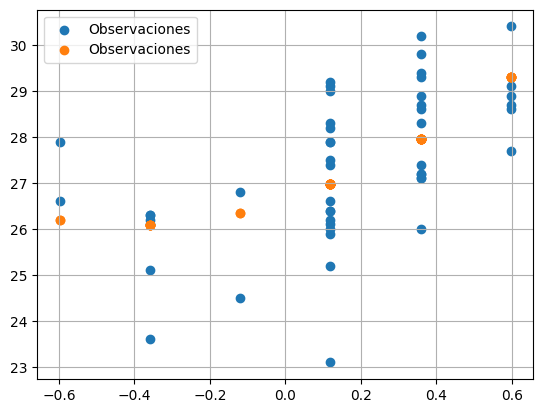

In [44]:
# Graficar proyección en Lin
import matplotlib.pyplot as plt
plt.scatter(df['Pronóstico_lin'], df['Temperatura máxima'],label='Observaciones') 
# f es la predicción de nuestro modelo de regresión lineal
# Graficar proyección en Cuad
plt.scatter(df['Pronóstico_lin'], f,label='Observaciones') 
plt.legend()
plt.grid()


In [45]:
p_lin

{'Lluvioso': -0.5976143046671968,
 'Mayormente nublado': -0.35856858280031806,
 'Nublado': -0.11952286093343936,
 'Parcialmente nublado': 0.11952286093343936,
 'Mayormente soleado': 0.35856858280031806,
 'Soleado': 0.5976143046671968}

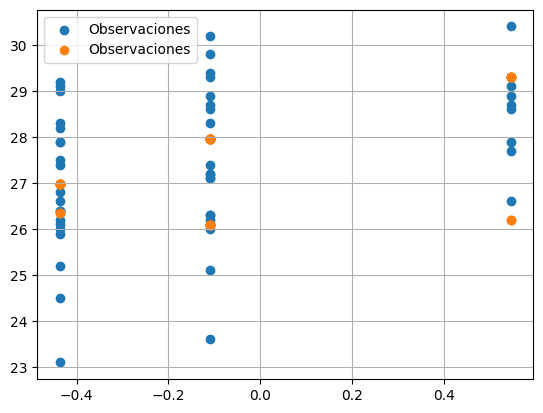

In [46]:
# Proyección cuadrática sobre 'Pronóstico_cuad'
plt.scatter(df['Pronóstico_cuad'], df['Temperatura máxima'],label='Observaciones') 
# f es la predicción de nuestro modelo de regresión lineal
# Graficar proyección en Cuad
plt.scatter(df['Pronóstico_cuad'], f,label='Observaciones') 
plt.legend()
plt.grid()